In [2]:
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

## converting the wav files in to a machine readable format

In [3]:
list_of_sounds = []

In [4]:
forward = []
back = []
left = []
right = []
stop = []

In [5]:
def audio_array(mylist,address):
    files = librosa.util.find_files("C:/Users/Asus/Desktop/recordings/{}".format(address),ext = ['wav'])
    files = np.asarray(files)
    for audio in files:
        sound,sample_rate = librosa.load(audio,sr=16000,res_type='kaiser_fast')
        mylist.append([sound,address])

In [6]:
audio_array(forward,"Forward")
audio_array(back,"back")
audio_array(left,"Left")
audio_array(right,"Right")
audio_array(stop,"Stop")

# understanding the audio by visualising it

In [7]:
import librosa.display
def show_plot(sample):
    x = sample[0]
    plt.figure(figsize=(12,4))
    librosa.display.waveplot(x, sr=16000)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(Xdb, sr=16000, x_axis='time', y_axis='hz')
    plt.colorbar()

## wave plot and spectrogram of the sound "forward"

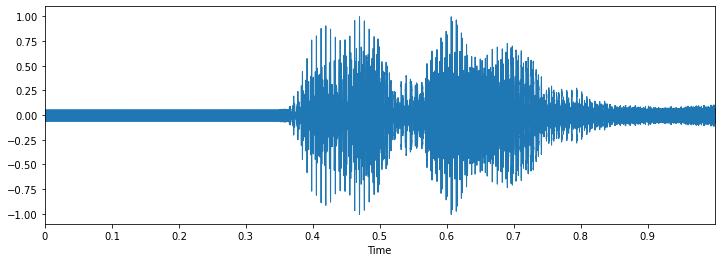

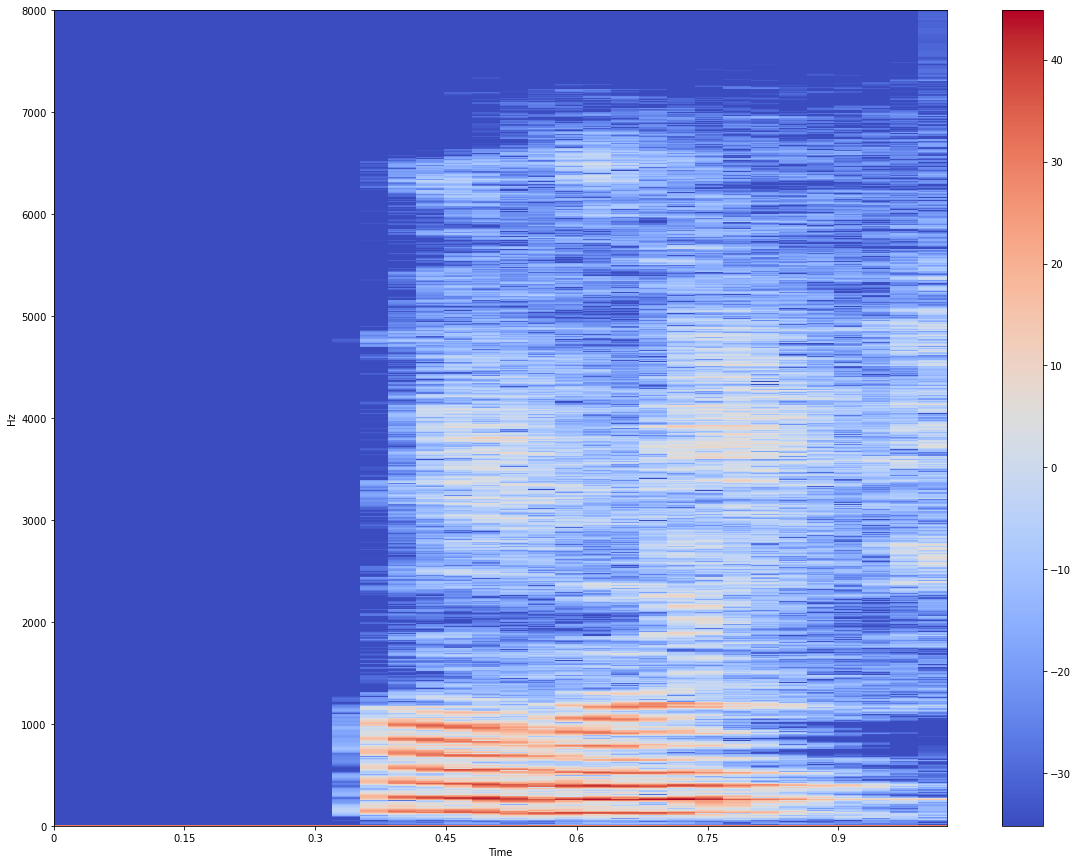

In [8]:
show_plot(forward[0])

## wave plot and spectrogram of the sound "Back"

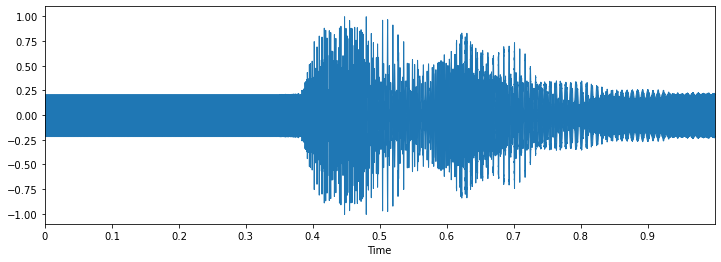

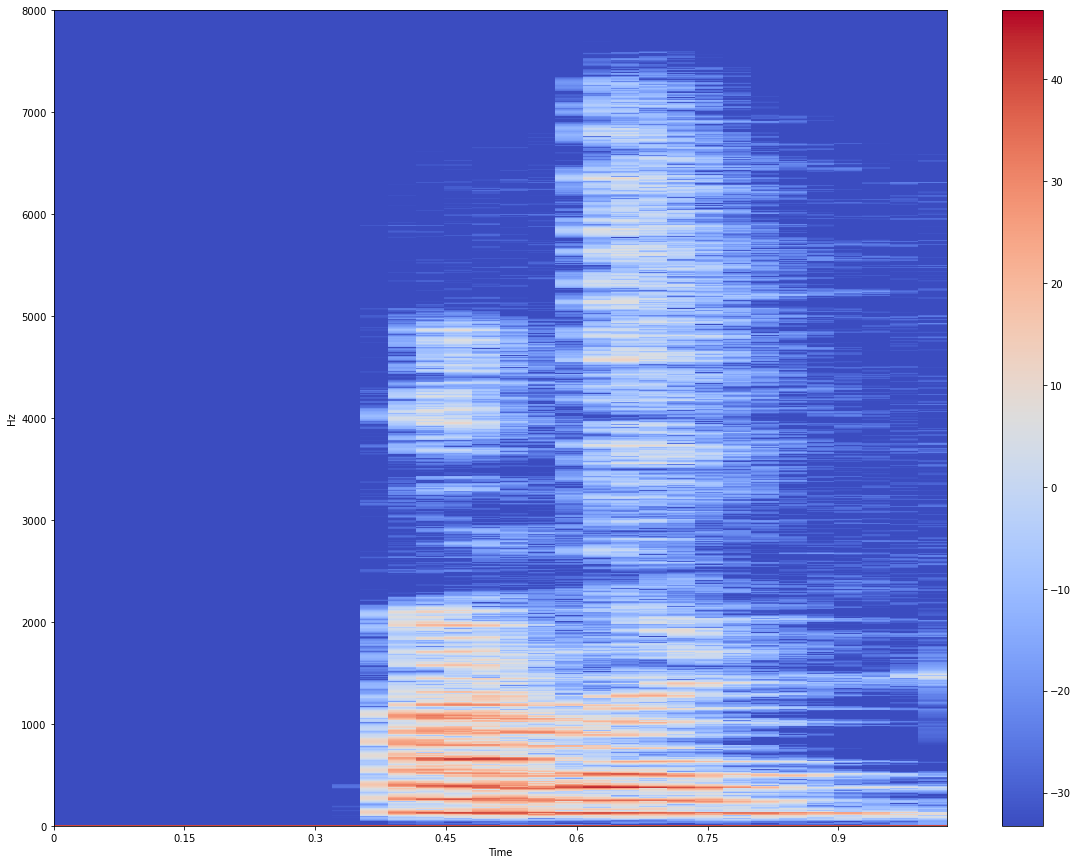

In [9]:
show_plot(back[0])

## wave plot and spectrogram of the sound "Left"

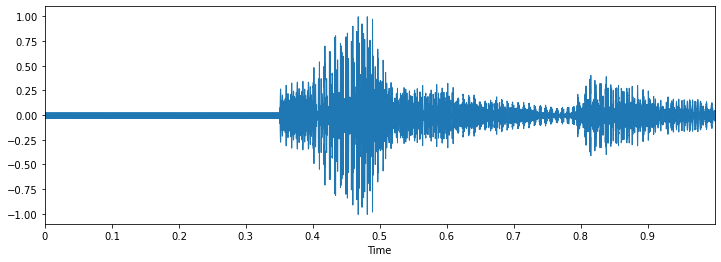

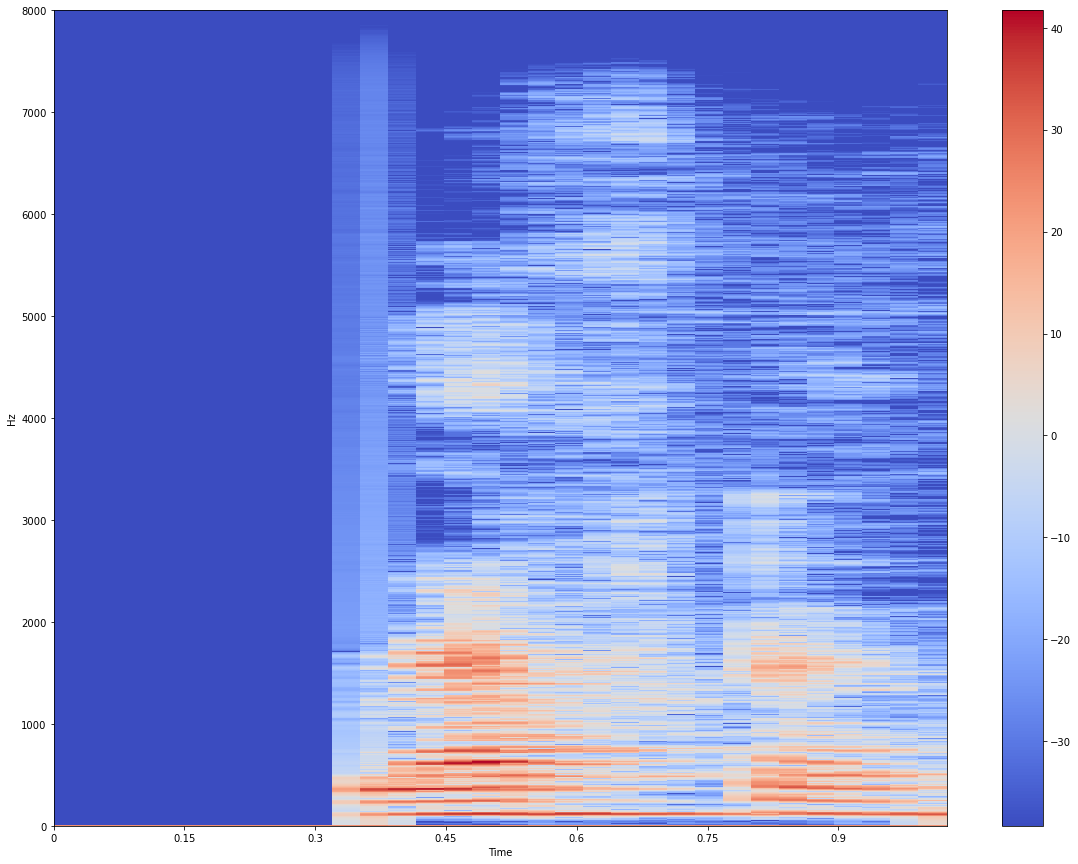

In [10]:
show_plot(left[4])

## wave plot and spectrogram of the sound "Right"

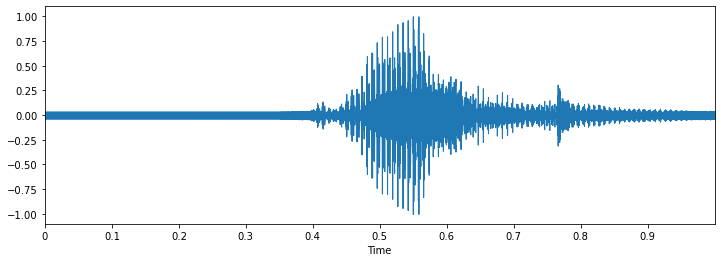

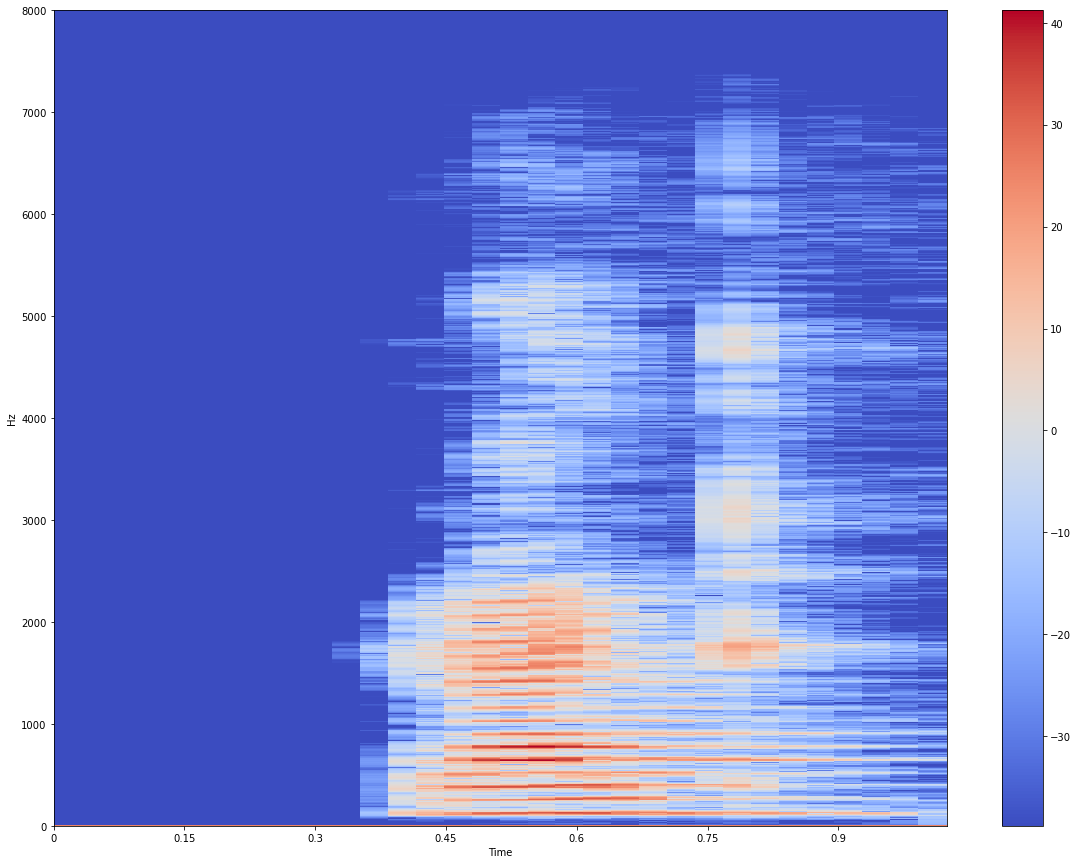

In [11]:
show_plot(right[0])

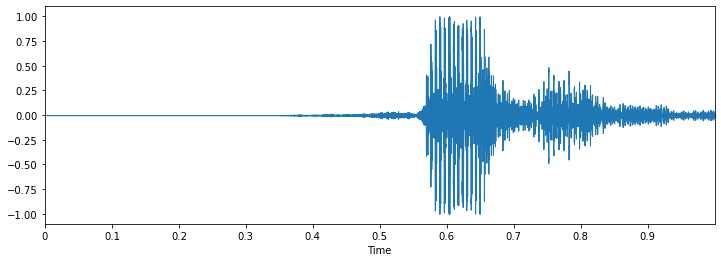

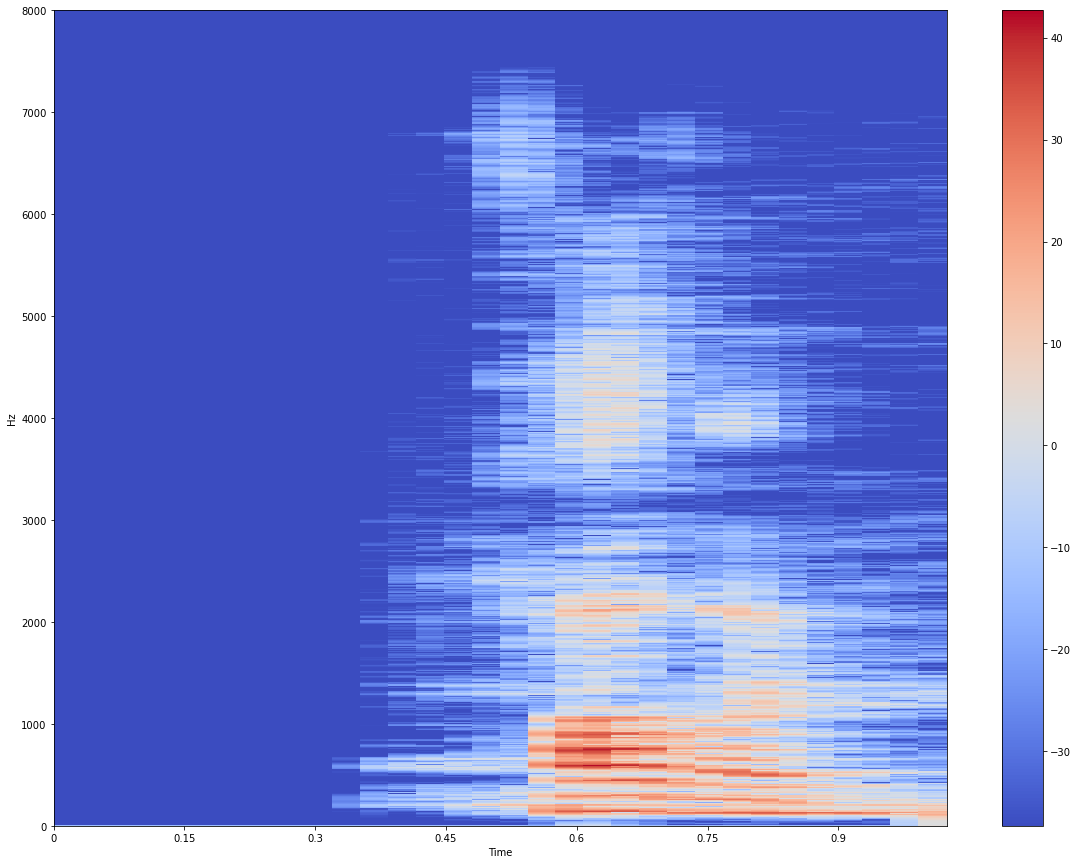

In [12]:
show_plot(stop[0])

## preprocessing of audio

### Normalization

In [13]:
import sklearn.preprocessing
def normalize(x):
    return sklearn.preprocessing.minmax_scale(x, axis=0)

In [14]:
for item in forward:
    item[0] = normalize(item[0])

In [15]:
for item in back:
    item[0] = normalize(item[0])

In [16]:
for item in left:
    item[0] = normalize(item[0])

In [17]:
for item in right:
    item[0] = normalize(item[0])

In [18]:
for item in stop:
    item[0] = normalize(item[0])

## Pre-emphasis

In [19]:
def preemp(soundList):
    for item in soundList:
        item[0] = librosa.effects.preemphasis(item[0])

In [20]:
preemp(forward)
preemp(back)
preemp(left)
preemp(right)
preemp(stop)

# now plotting the audio again and obeserving the changes

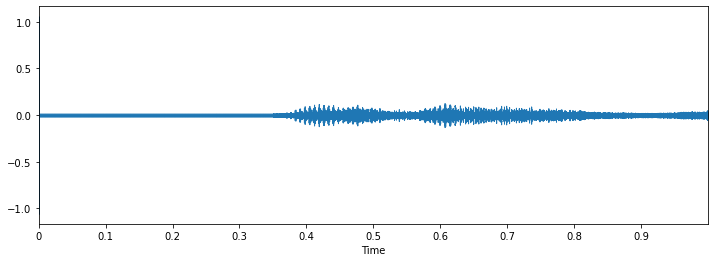

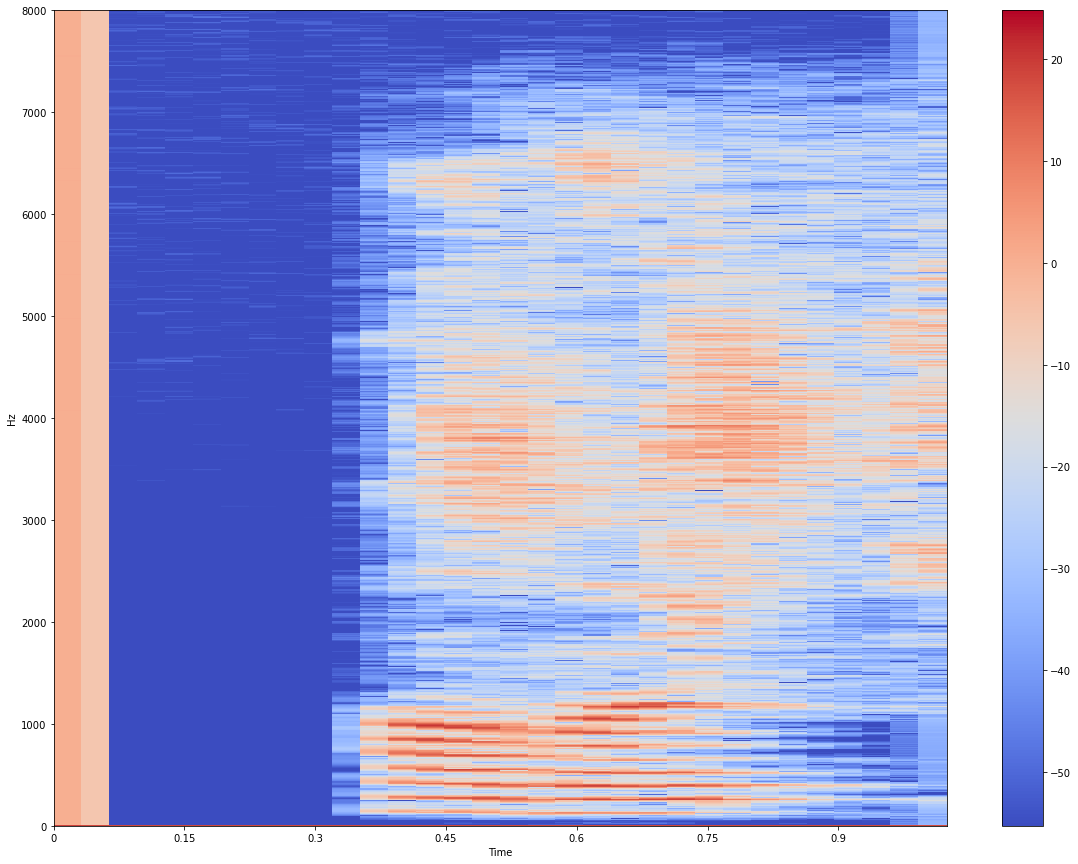

In [21]:
show_plot(forward[0])

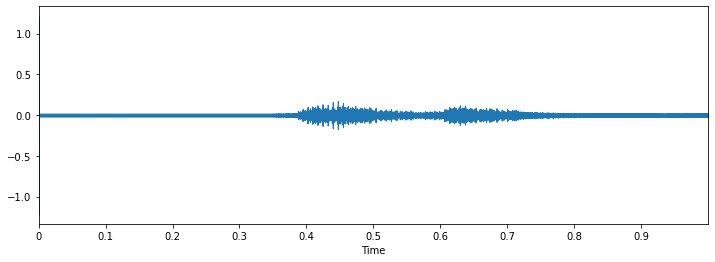

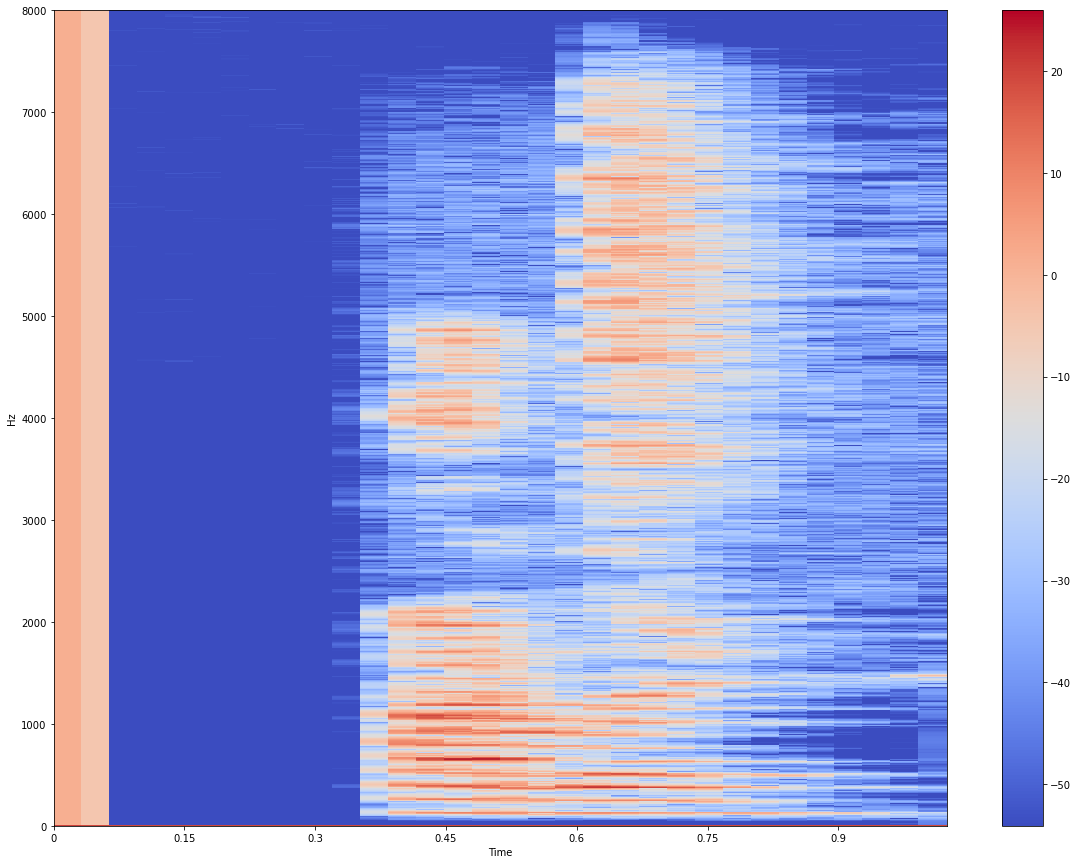

In [22]:
show_plot(back[0])

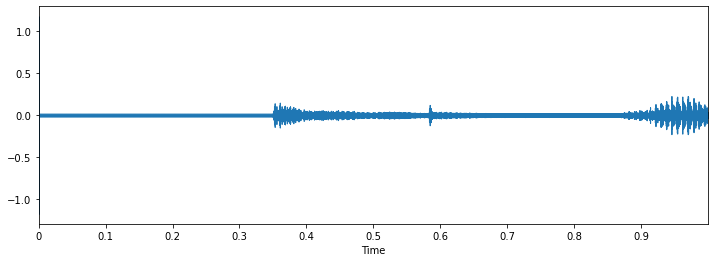

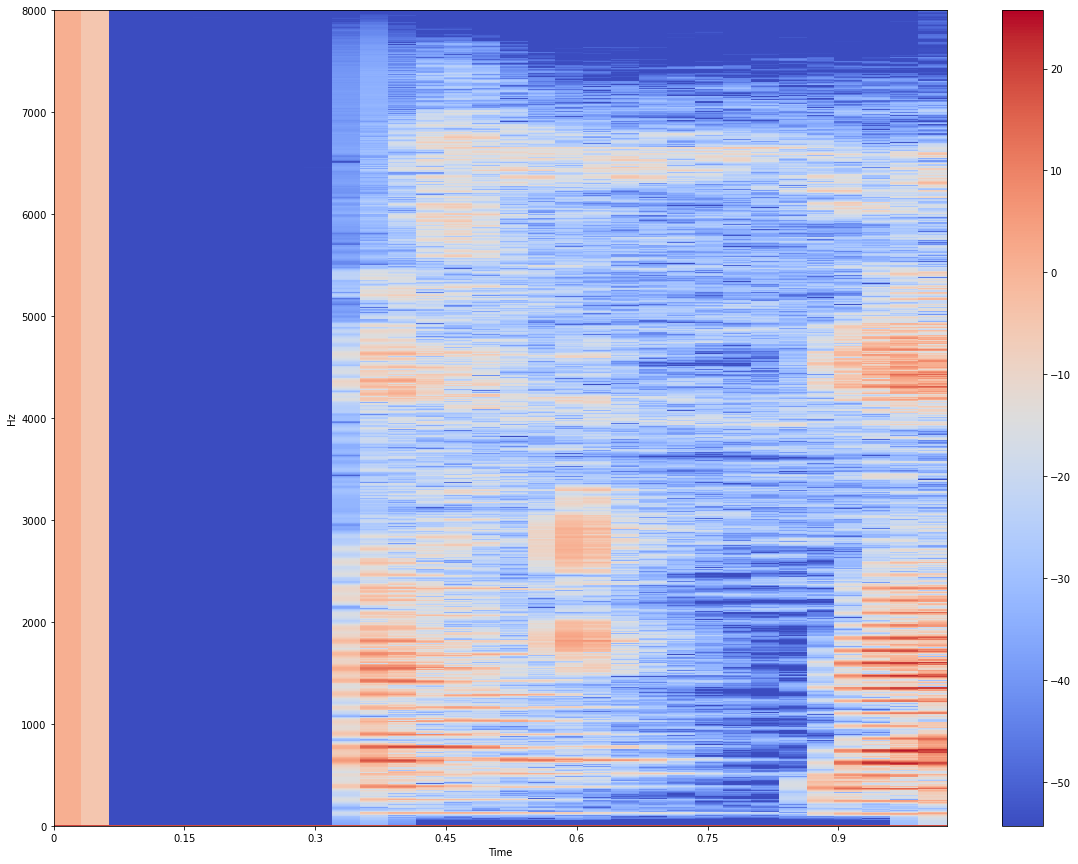

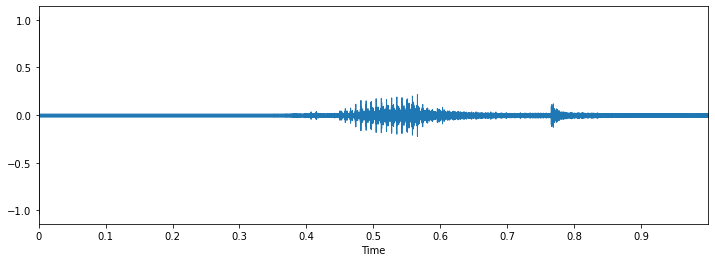

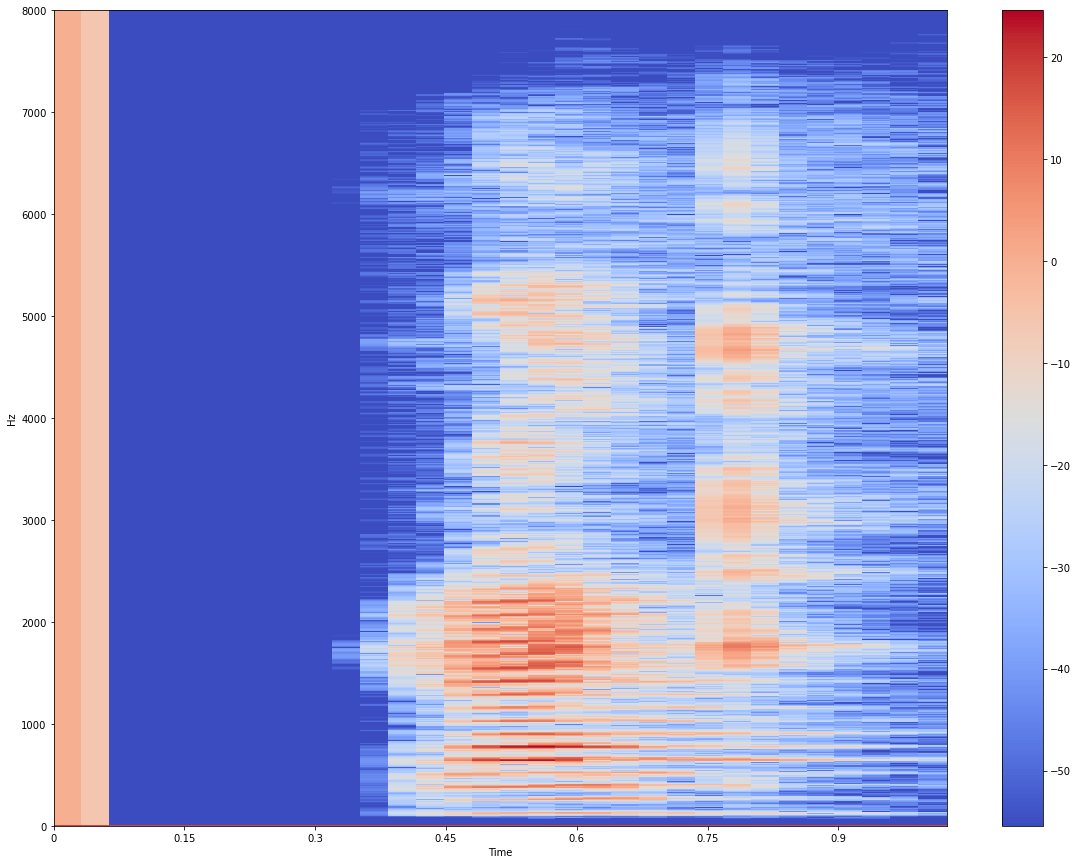

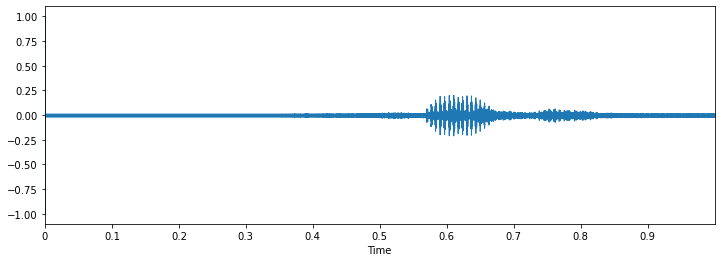

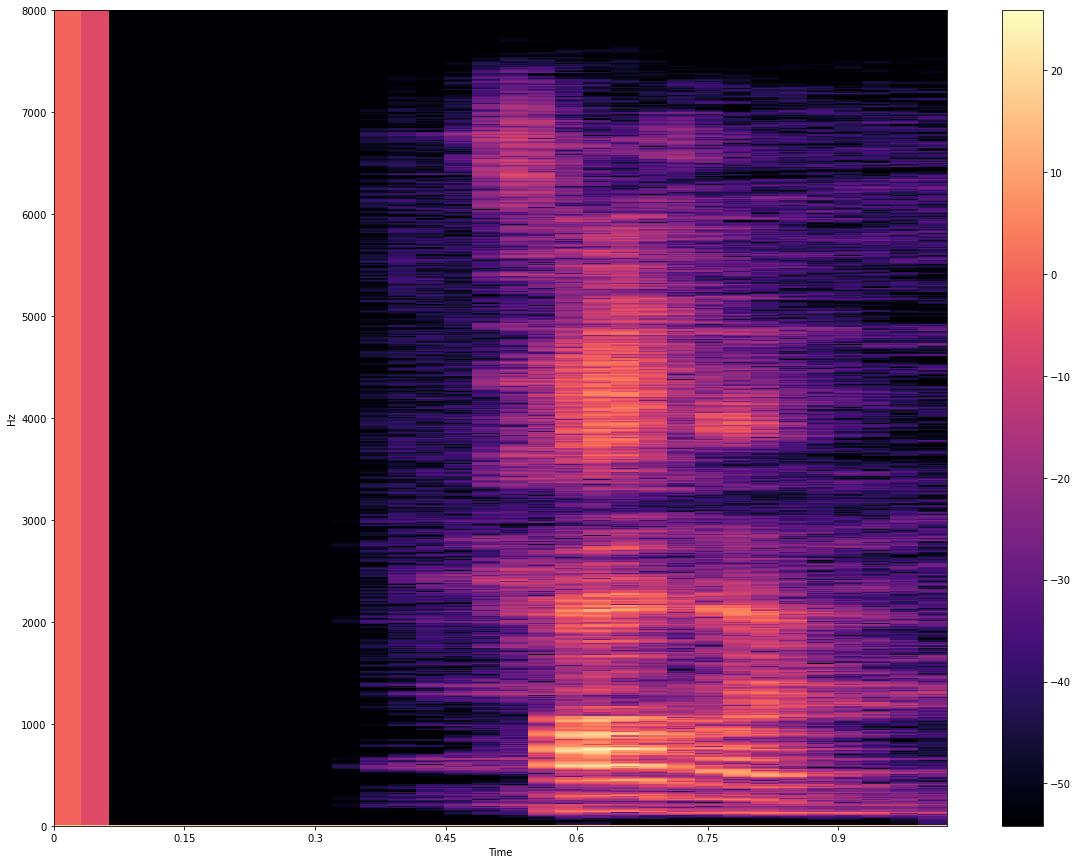

In [23]:
show_plot(left[0])
show_plot(right[0])
show_plot(stop[0])

# Feature Extraction

In [24]:
def mfcc(mylist):
  for samples in mylist: 
    mfcc_sound = librosa.feature.mfcc(y=samples[0], sr=16000, n_mfcc=40)
    samples[0] = np.mean(mfcc_sound.T,axis=0)

In [25]:
mfcc(forward)
mfcc(back)
mfcc(left)
mfcc(right)
mfcc(stop)

In [26]:
def appendItems(listA,listB):
  for items in listA:
    listB.append(items)

In [27]:
appendItems(forward,list_of_sounds)
appendItems(back,list_of_sounds)
appendItems(left,list_of_sounds)
appendItems(right,list_of_sounds)
appendItems(stop,list_of_sounds)

In [28]:
asDataframe  = pd.DataFrame(list_of_sounds,columns=["input","output"])

In [29]:
asDataframe

,input,output
0,"[-426.0587, 10.34419, 4.282278, 14.155941, -35...",Forward
1,"[-454.87753, 23.767302, -5.81475, -12.664465, ...",Forward
2,"[-424.93985, 16.957924, 12.405464, 9.167961, -...",Forward
3,"[-418.84155, 49.753662, 11.714583, 2.8228955, ...",Forward
4,"[-419.70898, 11.155443, -10.141459, -2.5763109...",Forward
...,...,...
397,"[-486.8028, -6.327261, -10.038765, -6.2693663,...",Stop
398,"[-502.23016, 8.391277, -16.068262, -12.630758,...",Stop
399,"[-495.58136, -8.0190735, -14.973534, -4.481054...",Stop
400,"[-464.26617, 10.815628, -9.343833, 19.887568, ...",Stop


# shuffling our data

In [30]:
asDataframe = asDataframe.sample(frac = 1)
asDataframe

,input,output
211,"[-358.64438, -20.117985, -13.8454075, 3.720048...",Left
333,"[-422.3499, 8.550075, -5.1585293, -17.711405, ...",Stop
306,"[-508.65585, 0.70319176, -15.003218, 19.343893...",Right
307,"[-506.18652, 24.231127, -23.663378, 5.806861, ...",Right
354,"[-511.85168, 19.148539, -4.9634447, -13.518391...",Stop
...,...,...
209,"[-355.69318, -11.818141, -14.941044, 5.773088,...",Left
3,"[-418.84155, 49.753662, 11.714583, 2.8228955, ...",Forward
212,"[-359.89478, -8.199948, -8.356748, 2.7134638, ...",Left
245,"[-468.94882, -1.0169663, -14.306888, -1.290437...",Right


In [31]:
#dummy =  np.array(asDataframe.output.tolist())#

In [32]:
#niques, ids = np.unique(dummy, return_inverse=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X = np.array(asDataframe.input.tolist())
y = np.array(asDataframe.output.tolist())

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
uniques, ids = np.unique(y, return_inverse=True)
y = to_categorical(ids)


In [34]:
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

 # splitting the data

In [35]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 127)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

num_labels = y.shape[1]
model = Sequential()
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [37]:
num_epochs = 500
num_batch_size = 32
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/500
11/11 [==============================] - 3s 240ms/step - loss: 44.8738 - accuracy: 0.1838 - val_loss: 8.2097 - val_accuracy: 0.2346
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 32.8931 - accuracy: 0.1869 - val_loss: 6.2665 - val_accuracy: 0.1605
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 25.8435 - accuracy: 0.2118 - val_loss: 7.2070 - val_accuracy: 0.1481
Epoch 4/500
11/11 [==============================] - 0s 3ms/step - loss: 17.7143 - accuracy: 0.1900 - val_loss: 2.3180 - val_accuracy: 0.1852
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 13.9018 - accuracy: 0.2056 - val_loss: 1.8651 - val_accuracy: 0.2099
Epoch 6/500
11/11 [==============================] - 0s 3ms/step - loss: 10.6440 - accuracy: 0.2399 - val_loss: 1.8404 - val_accuracy: 0.2099
Epoch 7/500
11/11 [==============================] - 0s 3ms/step - loss: 9.7965 - accuracy: 0.1963 - val_loss: 1.5682 - val_accuracy: 0.2716
Epoch

Epoch 59/500
11/11 [==============================] - 0s 3ms/step - loss: 1.6598 - accuracy: 0.2118 - val_loss: 1.6138 - val_accuracy: 0.1481
Epoch 60/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6457 - accuracy: 0.2336 - val_loss: 1.6142 - val_accuracy: 0.1481
Epoch 61/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6888 - accuracy: 0.2150 - val_loss: 1.6146 - val_accuracy: 0.1481
Epoch 62/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6379 - accuracy: 0.2243 - val_loss: 1.6150 - val_accuracy: 0.1481
Epoch 63/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6213 - accuracy: 0.2430 - val_loss: 1.6153 - val_accuracy: 0.1481
Epoch 64/500
11/11 [==============================] - 0s 6ms/step - loss: 1.6064 - accuracy: 0.2274 - val_loss: 1.6154 - val_accuracy: 0.1481
Epoch 65/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6236 - accuracy: 0.2430 - val_loss: 1.6157 - val_accuracy: 0.1481
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 1.6043 - accuracy: 0.2336 - val_loss: 1.6111 - val_accuracy: 0.2593
Epoch 117/500
11/11 [==============================] - 0s 3ms/step - loss: 1.6326 - accuracy: 0.2368 - val_loss: 1.5989 - val_accuracy: 0.3086
Epoch 118/500
11/11 [==============================] - 0s 3ms/step - loss: 1.6076 - accuracy: 0.2523 - val_loss: 1.5868 - val_accuracy: 0.3333
Epoch 119/500
11/11 [==============================] - 0s 3ms/step - loss: 1.6083 - accuracy: 0.2617 - val_loss: 1.5856 - val_accuracy: 0.3333
Epoch 120/500
11/11 [==============================] - 0s 3ms/step - loss: 1.6066 - accuracy: 0.2430 - val_loss: 1.5836 - val_accuracy: 0.3333
Epoch 121/500
11/11 [==============================] - 0s 4ms/step - loss: 1.5674 - accuracy: 0.2679 - val_loss: 1.5806 - val_accuracy: 0.3333
Epoch 122/500
11/11 [==============================] - 0s 4ms/step - loss: 1.5857 - accuracy: 0.2648 - val_loss: 1.5730 - val_accuracy: 0.3333
Epoch 123/500

11/11 [==============================] - 0s 4ms/step - loss: 1.4781 - accuracy: 0.3240 - val_loss: 1.4276 - val_accuracy: 0.4198
Epoch 174/500
11/11 [==============================] - 0s 4ms/step - loss: 1.4539 - accuracy: 0.3271 - val_loss: 1.4148 - val_accuracy: 0.3580
Epoch 175/500
11/11 [==============================] - 0s 4ms/step - loss: 1.4304 - accuracy: 0.3738 - val_loss: 1.4014 - val_accuracy: 0.4444
Epoch 176/500
11/11 [==============================] - 0s 4ms/step - loss: 1.4906 - accuracy: 0.2741 - val_loss: 1.3806 - val_accuracy: 0.5185
Epoch 177/500
11/11 [==============================] - 0s 4ms/step - loss: 1.4052 - accuracy: 0.3551 - val_loss: 1.4141 - val_accuracy: 0.4444
Epoch 178/500
11/11 [==============================] - 0s 4ms/step - loss: 1.4560 - accuracy: 0.3209 - val_loss: 1.4300 - val_accuracy: 0.3210
Epoch 179/500
11/11 [==============================] - 0s 3ms/step - loss: 1.4330 - accuracy: 0.3707 - val_loss: 1.4167 - val_accuracy: 0.3210
Epoch 180/500

11/11 [==============================] - 0s 4ms/step - loss: 0.8546 - accuracy: 0.6386 - val_loss: 0.8048 - val_accuracy: 0.7037
Epoch 231/500
11/11 [==============================] - 0s 3ms/step - loss: 0.8721 - accuracy: 0.6137 - val_loss: 0.7350 - val_accuracy: 0.7531
Epoch 232/500
11/11 [==============================] - 0s 4ms/step - loss: 0.8133 - accuracy: 0.6417 - val_loss: 0.6349 - val_accuracy: 0.7654
Epoch 233/500
11/11 [==============================] - 0s 4ms/step - loss: 0.8822 - accuracy: 0.6573 - val_loss: 0.6185 - val_accuracy: 0.7531
Epoch 234/500
11/11 [==============================] - 0s 4ms/step - loss: 0.8781 - accuracy: 0.6386 - val_loss: 0.6334 - val_accuracy: 0.7901
Epoch 235/500
11/11 [==============================] - 0s 4ms/step - loss: 0.7829 - accuracy: 0.6667 - val_loss: 0.6078 - val_accuracy: 0.7407
Epoch 236/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7523 - accuracy: 0.7040 - val_loss: 0.5250 - val_accuracy: 0.7778
Epoch 237/500

11/11 [==============================] - 0s 4ms/step - loss: 0.2989 - accuracy: 0.8879 - val_loss: 0.3181 - val_accuracy: 0.8642
Epoch 288/500
11/11 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8162 - val_loss: 0.3980 - val_accuracy: 0.7901
Epoch 289/500
11/11 [==============================] - 0s 4ms/step - loss: 0.3947 - accuracy: 0.8474 - val_loss: 0.3667 - val_accuracy: 0.8889
Epoch 290/500
11/11 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8100 - val_loss: 0.3573 - val_accuracy: 0.8765
Epoch 291/500
11/11 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8847 - val_loss: 0.3499 - val_accuracy: 0.8889
Epoch 292/500
11/11 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8598 - val_loss: 0.3290 - val_accuracy: 0.9012
Epoch 293/500
11/11 [==============================] - 0s 4ms/step - loss: 0.3670 - accuracy: 0.8505 - val_loss: 0.3184 - val_accuracy: 0.9012
Epoch 294/500

11/11 [==============================] - 0s 4ms/step - loss: 0.1864 - accuracy: 0.9283 - val_loss: 0.3839 - val_accuracy: 0.8765
Epoch 345/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9502 - val_loss: 0.3956 - val_accuracy: 0.8889
Epoch 346/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2117 - accuracy: 0.9252 - val_loss: 0.3616 - val_accuracy: 0.8765
Epoch 347/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2247 - accuracy: 0.9221 - val_loss: 0.3455 - val_accuracy: 0.8765
Epoch 348/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2136 - accuracy: 0.9252 - val_loss: 0.3654 - val_accuracy: 0.8642
Epoch 349/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1728 - accuracy: 0.9502 - val_loss: 0.3863 - val_accuracy: 0.8765
Epoch 350/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.9190 - val_loss: 0.4117 - val_accuracy: 0.8889
Epoch 351/500

11/11 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.9564 - val_loss: 0.4622 - val_accuracy: 0.8642
Epoch 402/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1051 - accuracy: 0.9751 - val_loss: 0.4823 - val_accuracy: 0.8642
Epoch 403/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0883 - accuracy: 0.9720 - val_loss: 0.5205 - val_accuracy: 0.8889
Epoch 404/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9657 - val_loss: 0.5129 - val_accuracy: 0.8765
Epoch 405/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.9221 - val_loss: 0.5784 - val_accuracy: 0.8642
Epoch 406/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.8879 - val_loss: 0.4582 - val_accuracy: 0.8765
Epoch 407/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9377 - val_loss: 0.4807 - val_accuracy: 0.8889
Epoch 408/500

11/11 [==============================] - 0s 4ms/step - loss: 0.3487 - accuracy: 0.8816 - val_loss: 0.3959 - val_accuracy: 0.8889
Epoch 459/500
11/11 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8941 - val_loss: 0.3966 - val_accuracy: 0.9012
Epoch 460/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2904 - accuracy: 0.8847 - val_loss: 0.4129 - val_accuracy: 0.8642
Epoch 461/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2928 - accuracy: 0.8816 - val_loss: 0.3606 - val_accuracy: 0.8642
Epoch 462/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.9065 - val_loss: 0.3763 - val_accuracy: 0.8765
Epoch 463/500
11/11 [==============================] - 0s 5ms/step - loss: 0.2624 - accuracy: 0.9315 - val_loss: 0.3673 - val_accuracy: 0.8642
Epoch 464/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2283 - accuracy: 0.9315 - val_loss: 0.4256 - val_accuracy: 0.8765
Epoch 465/500

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               10496     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [39]:
y_pred = np.around(model.predict(x_test))

In [40]:
y_pred = uniques[y_pred.argmax(1)]
y_pred = label_encoder.inverse_transform(y_pred)
y_pred

array(['Left', 'Forward', 'back', 'Forward', 'Right', 'back', 'Right',
       'back', 'Left', 'Left', 'Left', 'Right', 'Right', 'back', 'back',
       'Forward', 'Left', 'Forward', 'Right', 'back', 'Forward', 'Stop',
       'Left', 'Stop', 'Stop', 'Left', 'Forward', 'Right', 'Forward',
       'Forward', 'Left', 'Stop', 'back', 'Left', 'back', 'Left', 'Left',
       'Forward', 'Right', 'Forward', 'Stop', 'Left', 'Stop', 'back',
       'Forward', 'Right', 'Stop', 'Right', 'Left', 'Stop', 'Left',
       'Forward', 'Left', 'Right', 'Right', 'Right', 'Left', 'Right',
       'back', 'back', 'Left', 'Left', 'back', 'back', 'Right', 'Stop',
       'Left', 'Left', 'back', 'Left', 'Forward', 'back', 'Forward',
       'Stop', 'Left', 'Stop', 'Left', 'Stop', 'back', 'Stop', 'Left'],
      dtype='<U7')

In [41]:
original = uniques[y_test.argmax(1)]
original = label_encoder.inverse_transform(original)


In [44]:
from sklearn import metrics
print(metrics.confusion_matrix(original, y_pred))

[[13  0  0  1  0]
 [ 0 20  2  0  0]
 [ 0  4 12  0  1]
 [ 0  0  0 12  0]
 [ 1  0  0  0 15]]


In [46]:
print(metrics.accuracy_score(original, y_pred))

0.8888888888888888


# testing for user input

In [50]:
import sounddevice as sd
import scipy
import wavio
import time
import winsound as win

sampling_rate = 16000
duration = 1
def record():
    
    print("recording will start in 5 seconds")
    k = 4
    for j in range(0,4):
        print("in ",k,"seconds")
        time.sleep(1)
        k = k-1

    print("speak after the beeps")
    win.Beep(1000,1000)
    recording = sd.rec(sampling_rate*duration, samplerate=sampling_rate,channels=1)
    sd.wait()
    wavio.write("outputs/output.wav", recording, sampling_rate,sampwidth=2)
    recording ,sr= librosa.load("outputs/output.wav",sr=16000,res_type = 'kaiser_fast')
    return recording
    


In [51]:
def listen_predict():
    audio = record()
    audio = normalize(audio)
    audio = librosa.effects.preemphasis(audio)
    mfcc_sound = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=40)
    audio = np.mean(mfcc_sound.T,axis=0)
    answer = model.predict(np.array([audio]))
    answer = np.around(answer)
    answer = uniques[answer.argmax(1)]
    answer = label_encoder.inverse_transform(answer)
    print(answer)

In [52]:
listen_predict()

recording will start in 5 seconds
in  4 seconds
in  3 seconds
in  2 seconds
in  1 seconds
speak after the beeps
['Forward']
